In [1]:
from pathlib import Path
import os
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import subprocess
import sys
import numpy as np

model_checkpoint = r'C:\Users\Vzhan\OneDrive\Bureau\Master\Epitech\TravelOrder\Travel-Order-Resolver\ai\nlp\models\tokens_classification\distilbert'

try:
    files = list(Path(model_checkpoint).glob('**/*'))
    print("Contenu du dossier:", [str(file) for file in files])
except FileNotFoundError:
    print("Le chemin spécifié est introuvable.")

try:
    from transformers import pipeline, AutoTokenizer, AutoModelForTokenClassification
except ModuleNotFoundError:
    print("Transformers not found. Installing...")
    subprocess.check_call([sys.executable, "-m", "pip", "install", "transformers"])
    from transformers import pipeline, AutoTokenizer, AutoModelForTokenClassification

tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)
model = AutoModelForTokenClassification.from_pretrained(model_checkpoint)

ner_pipeline = pipeline(
    "token-classification",
    model=model,
    tokenizer=tokenizer,
    aggregation_strategy="simple"  # Combine les sous-tokens en un seul
)

phrases = [
    "Je pars de Paris et j'arrive à Marseille.",
    "Je vais à Bordeaux en partant de Toulouse.",
    "Mon trajet va de VILLIERS SUR LOIR à JARNY.",
    "Nous partons de Lyon et nous arrivons à Nice.",
    "Le départ est prévu à Lille, et l'arrivée se fera à Strasbourg.",
    "Mon itinéraire inclut un départ de Montpellier et une arrivée à Perpignan.",
    "Le train partira de Nantes pour arriver à Rennes.",
    "Un vol de Genève à Zurich est prévu demain matin.",
    "Je vais de Grenoble à Dijon en voiture.",
    "Je voyage de Bruxelles à Amsterdam ce week-end.",
    "L'itinéraire commence à Marseille et se termine à Toulon.",
    "Nous prenons un train de Rouen pour aller au Havre.",
    "Le départ sera à Limoges et l'arrivée à Poitiers.",
    "Je quitte Monaco pour aller à Menton.",
    "Le bus va de Caen à Cherbourg.",
    "Il part de Bayonne et arrive à Biarritz.",
    "Je vais de Chamonix à Annecy.",
    "Nous roulons de Bastia à Ajaccio.",
    "Le ferry part de Calais pour arriver à Douvres.",
    "Je pars de Bordeaux et j'arrive à Paris.",
    "Notre vol va de Madrid à Barcelone.",
    "Un trajet en voiture de Milan à Rome est prévu.",
    "Je vais à Paris en partant de Lyon."
]

entities = []
entity_types = []

for phrase in phrases:
    print(f"\nPhrase: {phrase}")
    try:
        results = ner_pipeline(phrase)
        for entity in results:
            print(f"Entity: {entity['word']}, Label: {entity['entity_group']}")
            entities.append(entity['word'])
            entity_types.append(entity['entity_group'])
    except Exception as e:
        print(f"Erreur lors du traitement de la phrase '{phrase}': {e}")


Contenu du dossier: ['C:\\Users\\Vzhan\\OneDrive\\Bureau\\Master\\Epitech\\TravelOrder\\Travel-Order-Resolver\\ai\\nlp\\models\\tokens_classification\\distilbert\\config.json', 'C:\\Users\\Vzhan\\OneDrive\\Bureau\\Master\\Epitech\\TravelOrder\\Travel-Order-Resolver\\ai\\nlp\\models\\tokens_classification\\distilbert\\distilbert-finetuned-token-classification', 'C:\\Users\\Vzhan\\OneDrive\\Bureau\\Master\\Epitech\\TravelOrder\\Travel-Order-Resolver\\ai\\nlp\\models\\tokens_classification\\distilbert\\model.safetensors', 'C:\\Users\\Vzhan\\OneDrive\\Bureau\\Master\\Epitech\\TravelOrder\\Travel-Order-Resolver\\ai\\nlp\\models\\tokens_classification\\distilbert\\special_tokens_map.json', 'C:\\Users\\Vzhan\\OneDrive\\Bureau\\Master\\Epitech\\TravelOrder\\Travel-Order-Resolver\\ai\\nlp\\models\\tokens_classification\\distilbert\\tokenizer.json', 'C:\\Users\\Vzhan\\OneDrive\\Bureau\\Master\\Epitech\\TravelOrder\\Travel-Order-Resolver\\ai\\nlp\\models\\tokens_classification\\distilbert\\tokeni

C:\Users\Vzhan\AppData\Local\Temp\ipykernel_2736\3704083993.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(entity_counter.keys()), y=list(entity_counter.values()), palette="viridis")


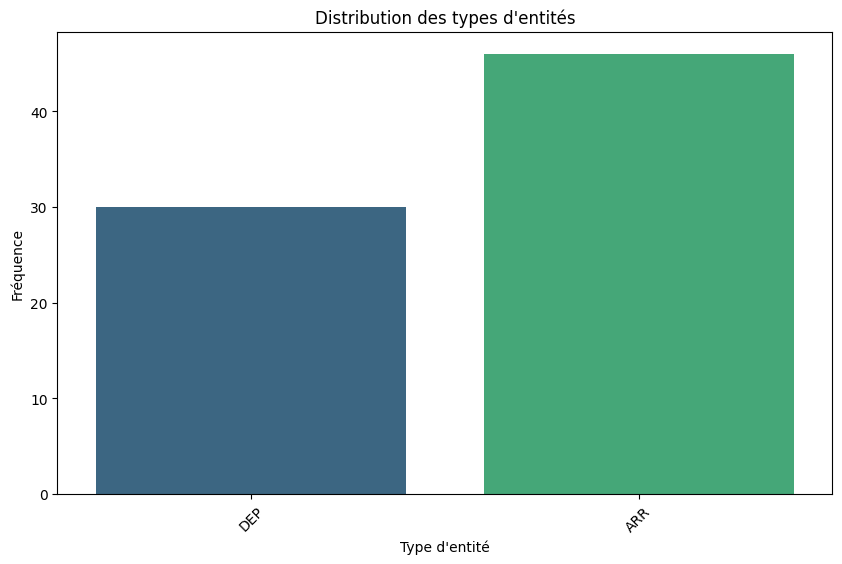

In [2]:

# Visualisation des types d'entités
if entity_types:
    plt.figure(figsize=(10, 6))
    entity_counter = Counter(entity_types)
    sns.barplot(x=list(entity_counter.keys()), y=list(entity_counter.values()), palette="viridis")
    plt.title("Distribution des types d'entités")
    plt.xlabel("Type d'entité")
    plt.ylabel("Fréquence")
    plt.xticks(rotation=45)
    plt.show()


C:\Users\Vzhan\AppData\Local\Temp\ipykernel_2736\3392754547.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[e[0] for e in top_entities], y=[e[1] for e in top_entities], palette="Blues_d")


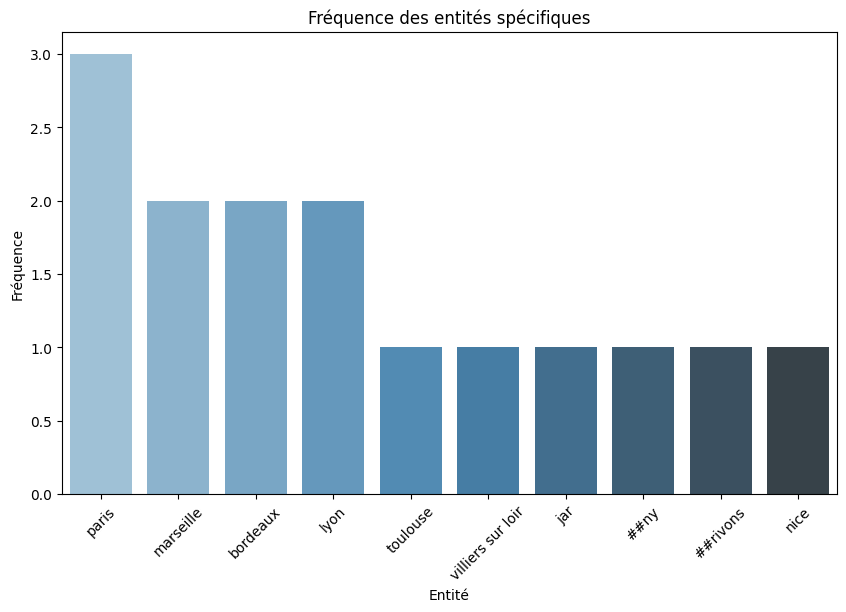

In [3]:

# Visualisation des entités spécifiques
if entities:
    plt.figure(figsize=(10, 6))
    entity_freq = Counter(entities)
    top_entities = entity_freq.most_common(10)  # Top 10 entités les plus fréquentes
    sns.barplot(x=[e[0] for e in top_entities], y=[e[1] for e in top_entities], palette="Blues_d")
    plt.title("Fréquence des entités spécifiques")
    plt.xlabel("Entité")
    plt.ylabel("Fréquence")
    plt.xticks(rotation=45)
    plt.show()


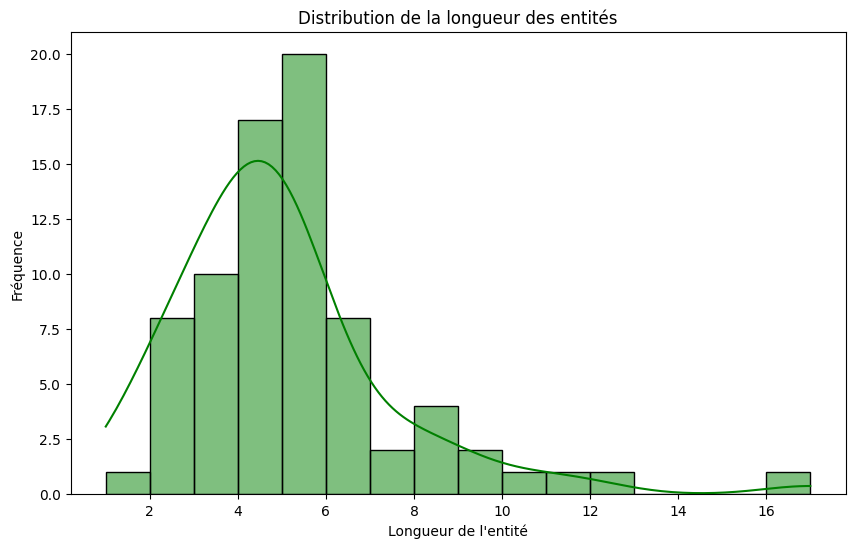

In [4]:

# Visualisation de la longueur des entités
if entities:
    entity_lengths = [len(ent) for ent in entities]
    plt.figure(figsize=(10, 6))
    sns.histplot(entity_lengths, kde=True, color='green')
    plt.title("Distribution de la longueur des entités")
    plt.xlabel("Longueur de l'entité")
    plt.ylabel("Fréquence")
    plt.show()